# 🧠 BENDR — Training & Sequence Prediction Results

**Notebook Purpose:** Static visualization and detailed analysis of per-subject results from the BENDR custom pipeline.  
**Data sources:**
- `training_log.csv` — Per-subject training loss, accuracy, timing
- `seq_results.csv`  — Sequence-level prediction metrics

---

In [1]:
# ─── Imports ───────────────────────────────────────────────────────────────
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# High-DPI static figures
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['savefig.dpi'] = 150
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['axes.spines.top']   = False
matplotlib.rcParams['axes.spines.right'] = False

# ─── Paths ─────────────────────────────────────────────────────────────────
RESULTS_DIR = os.path.dirname(os.path.abspath('__file__'))
TRAIN_CSV   = os.path.join(RESULTS_DIR, 'training_log.csv')
SEQ_CSV     = os.path.join(RESULTS_DIR, 'seq_results.csv')

# Fallback: use relative paths if running from notebook dir
if not os.path.exists(TRAIN_CSV):
    TRAIN_CSV = 'training_log.csv'
    SEQ_CSV   = 'seq_results.csv'

print(f'Training log : {TRAIN_CSV}')
print(f'Seq results  : {SEQ_CSV}')

Training log : /home/nummm/Documents/CEPP/BENDR/custom/results/training_log.csv
Seq results  : /home/nummm/Documents/CEPP/BENDR/custom/results/seq_results.csv


## 1. Load & Inspect Data

In [2]:
# ─── Load CSVs ─────────────────────────────────────────────────────────────
train_df = pd.read_csv(TRAIN_CSV)
seq_df   = pd.read_csv(SEQ_CSV)

# Clean: drop empty rows
train_df.dropna(how='all', inplace=True)
seq_df.dropna(how='all', inplace=True)

# Short subject label (first 8 chars)
train_df['subj_short'] = train_df['subject_id'].str[:8]
seq_df['subj_short']   = seq_df['subject_id'].str[:8]

# Rank by accuracy (descending)
train_df['acc_rank'] = train_df['accuracy'].rank(ascending=False, method='first').astype(int)
seq_df['acc_rank']   = seq_df['accuracy'].rank(ascending=False, method='first').astype(int)

print('=== training_log.csv ===')
display(train_df.head())
print(f'\nShape: {train_df.shape}')
display(train_df.describe().round(4))

=== training_log.csv ===


,subject_id,dataset,seq_len,loss,accuracy,mask_pct,elapsed_s,samples_per_sec,subj_short,acc_rank
0,00000399-159547,custom,15360,3.959452,0.2188,0.3,6.918,2220.5,00000399,4
1,00000400-159547,custom,15360,4.440310,0.0688,0.3,7.028,2185.7,00000400,29
2,00000401-159547,custom,15360,4.179402,0.1625,0.3,6.904,2225.0,00000401,7
3,00000403-159547,custom,15360,4.576562,0.0437,0.3,6.645,2311.6,00000403,37
4,00000405-159547,custom,15360,4.216953,0.1375,0.3,6.981,2200.3,00000405,12



Shape: (40, 10)


,seq_len,loss,accuracy,mask_pct,elapsed_s,samples_per_sec,acc_rank
count,40.0,40.0000,40.0000,40.0,40.0000,40.0000,40.0000
mean,15360.0,4.2913,0.1203,0.3,7.0306,2186.1800,20.5000
std,0.0,0.2334,0.0808,0.0,0.1807,56.1315,11.6905
min,15360.0,3.4668,0.0250,0.3,6.6450,2055.2000,1.0000
25%,15360.0,4.1575,0.0562,0.3,6.9085,2152.5500,10.7500
50%,15360.0,4.3649,0.1094,0.3,7.0450,2180.3000,20.5000
75%,15360.0,4.4668,0.1500,0.3,7.1355,2223.5000,30.2500
max,15360.0,4.5766,0.4437,0.3,7.4740,2311.6000,40.0000


In [3]:
print('=== seq_results.csv ===')
display(seq_df.head())
print(f'\nShape: {seq_df.shape}')
display(seq_df.describe().round(4))

=== seq_results.csv ===


,subject_id,dataset,seq_len,loss,accuracy,mask_pct,elapsed_s,samples_per_sec,subj_short,acc_rank
0,00000399-159547,custom,15360,3.959452,0.2188,0.3,6.918,2220.5,00000399,4
1,00000400-159547,custom,15360,4.440310,0.0688,0.3,7.028,2185.7,00000400,29
2,00000401-159547,custom,15360,4.179402,0.1625,0.3,6.904,2225.0,00000401,7
3,00000403-159547,custom,15360,4.576562,0.0437,0.3,6.645,2311.6,00000403,37
4,00000405-159547,custom,15360,4.216953,0.1375,0.3,6.981,2200.3,00000405,12



Shape: (40, 10)


,seq_len,loss,accuracy,mask_pct,elapsed_s,samples_per_sec,acc_rank
count,40.0,40.0000,40.0000,40.0,40.0000,40.0000,40.0000
mean,15360.0,4.2913,0.1203,0.3,7.0306,2186.1800,20.5000
std,0.0,0.2334,0.0808,0.0,0.1807,56.1315,11.6905
min,15360.0,3.4668,0.0250,0.3,6.6450,2055.2000,1.0000
25%,15360.0,4.1575,0.0562,0.3,6.9085,2152.5500,10.7500
50%,15360.0,4.3649,0.1094,0.3,7.0450,2180.3000,20.5000
75%,15360.0,4.4668,0.1500,0.3,7.1355,2223.5000,30.2500
max,15360.0,4.5766,0.4437,0.3,7.4740,2311.6000,40.0000


## 2. Summary Statistics Table

In [4]:
def summary_table(df, label):
    cols = ['loss', 'accuracy', 'elapsed_s', 'samples_per_sec']
    stats = df[cols].agg(['mean','median','std','min','max']).T
    stats.columns = ['Mean', 'Median', 'Std', 'Min', 'Max']
    stats = stats.round(4)
    print(f'\n── {label} ──')
    display(stats)
    return stats

train_stats = summary_table(train_df, 'Training Log')
seq_stats   = summary_table(seq_df,   'Sequence Results')


── Training Log ──


,Mean,Median,Std,Min,Max
loss,4.2913,4.3649,0.2334,3.4668,4.5766
accuracy,0.1203,0.1094,0.0808,0.0250,0.4437
elapsed_s,7.0306,7.0450,0.1807,6.6450,7.4740
samples_per_sec,2186.1800,2180.3000,56.1315,2055.2000,2311.6000



── Sequence Results ──


,Mean,Median,Std,Min,Max
loss,4.2913,4.3649,0.2334,3.4668,4.5766
accuracy,0.1203,0.1094,0.0808,0.0250,0.4437
elapsed_s,7.0306,7.0450,0.1807,6.6450,7.4740
samples_per_sec,2186.1800,2180.3000,56.1315,2055.2000,2311.6000


## 3. Best & Worst Performing Subjects

In [5]:
def top_bottom(df, col, n=5, ascending=False, label=''):
    sorted_df = df.sort_values(col, ascending=ascending)
    top    = sorted_df.head(n)[['subject_id', 'loss', 'accuracy', 'elapsed_s', 'samples_per_sec']]
    bottom = sorted_df.tail(n)[['subject_id', 'loss', 'accuracy', 'elapsed_s', 'samples_per_sec']]
    print(f'\n{label} — Top {n} (highest {col})' if not ascending else f'\n{label} — Bottom {n} (lowest {col})')
    display(top.round(4))
    return top, bottom

print('=== Training Log ===')
top_acc_train, _ = top_bottom(train_df, 'accuracy', n=5, ascending=False, label='Training')
_, low_acc_train = top_bottom(train_df, 'accuracy', n=5, ascending=True,  label='Training')
print('\nLowest Accuracy:')
display(low_acc_train.round(4))

print('\n=== Seq Results ===')
top_acc_seq, _ = top_bottom(seq_df, 'accuracy', n=5, ascending=False, label='Seq')
_, low_acc_seq = top_bottom(seq_df, 'accuracy', n=5, ascending=True,  label='Seq')
print('\nLowest Accuracy:')
display(low_acc_seq.round(4))

=== Training Log ===

Training — Top 5 (highest accuracy)


,subject_id,loss,accuracy,elapsed_s,samples_per_sec
21,00000449-159547,3.4668,0.4437,7.340,2092.8
6,00000409-159547,4.0569,0.3063,6.910,2223.0
18,00000444-159547,4.2687,0.2250,7.145,2149.8
0,00000399-159547,3.9595,0.2188,6.918,2220.5
14,00000437-159547,4.1627,0.2062,6.932,2215.8



Training — Bottom 5 (lowest accuracy)


,subject_id,loss,accuracy,elapsed_s,samples_per_sec
11,00000422-159547,4.4912,0.0250,7.101,2163.1
24,00000454-159547,4.5370,0.0375,7.319,2098.5
3,00000403-159547,4.5766,0.0437,6.645,2311.6
34,00000474-159547,4.4506,0.0437,7.252,2118.2
19,00000446-159547,4.4880,0.0500,7.135,2152.7



Lowest Accuracy:


,subject_id,loss,accuracy,elapsed_s,samples_per_sec
29,00000464-159547,3.8054,0.2062,7.221,2127.2
0,00000399-159547,3.9595,0.2188,6.918,2220.5
18,00000444-159547,4.2687,0.2250,7.145,2149.8
6,00000409-159547,4.0569,0.3063,6.910,2223.0
21,00000449-159547,3.4668,0.4437,7.340,2092.8



=== Seq Results ===

Seq — Top 5 (highest accuracy)


,subject_id,loss,accuracy,elapsed_s,samples_per_sec
21,00000449-159547,3.4668,0.4437,7.340,2092.8
6,00000409-159547,4.0569,0.3063,6.910,2223.0
18,00000444-159547,4.2687,0.2250,7.145,2149.8
0,00000399-159547,3.9595,0.2188,6.918,2220.5
14,00000437-159547,4.1627,0.2062,6.932,2215.8



Seq — Bottom 5 (lowest accuracy)


,subject_id,loss,accuracy,elapsed_s,samples_per_sec
11,00000422-159547,4.4912,0.0250,7.101,2163.1
24,00000454-159547,4.5370,0.0375,7.319,2098.5
3,00000403-159547,4.5766,0.0437,6.645,2311.6
34,00000474-159547,4.4506,0.0437,7.252,2118.2
19,00000446-159547,4.4880,0.0500,7.135,2152.7



Lowest Accuracy:


,subject_id,loss,accuracy,elapsed_s,samples_per_sec
29,00000464-159547,3.8054,0.2062,7.221,2127.2
0,00000399-159547,3.9595,0.2188,6.918,2220.5
18,00000444-159547,4.2687,0.2250,7.145,2149.8
6,00000409-159547,4.0569,0.3063,6.910,2223.0
21,00000449-159547,3.4668,0.4437,7.340,2092.8


## 4. Accuracy Distribution — Training vs Sequence Results

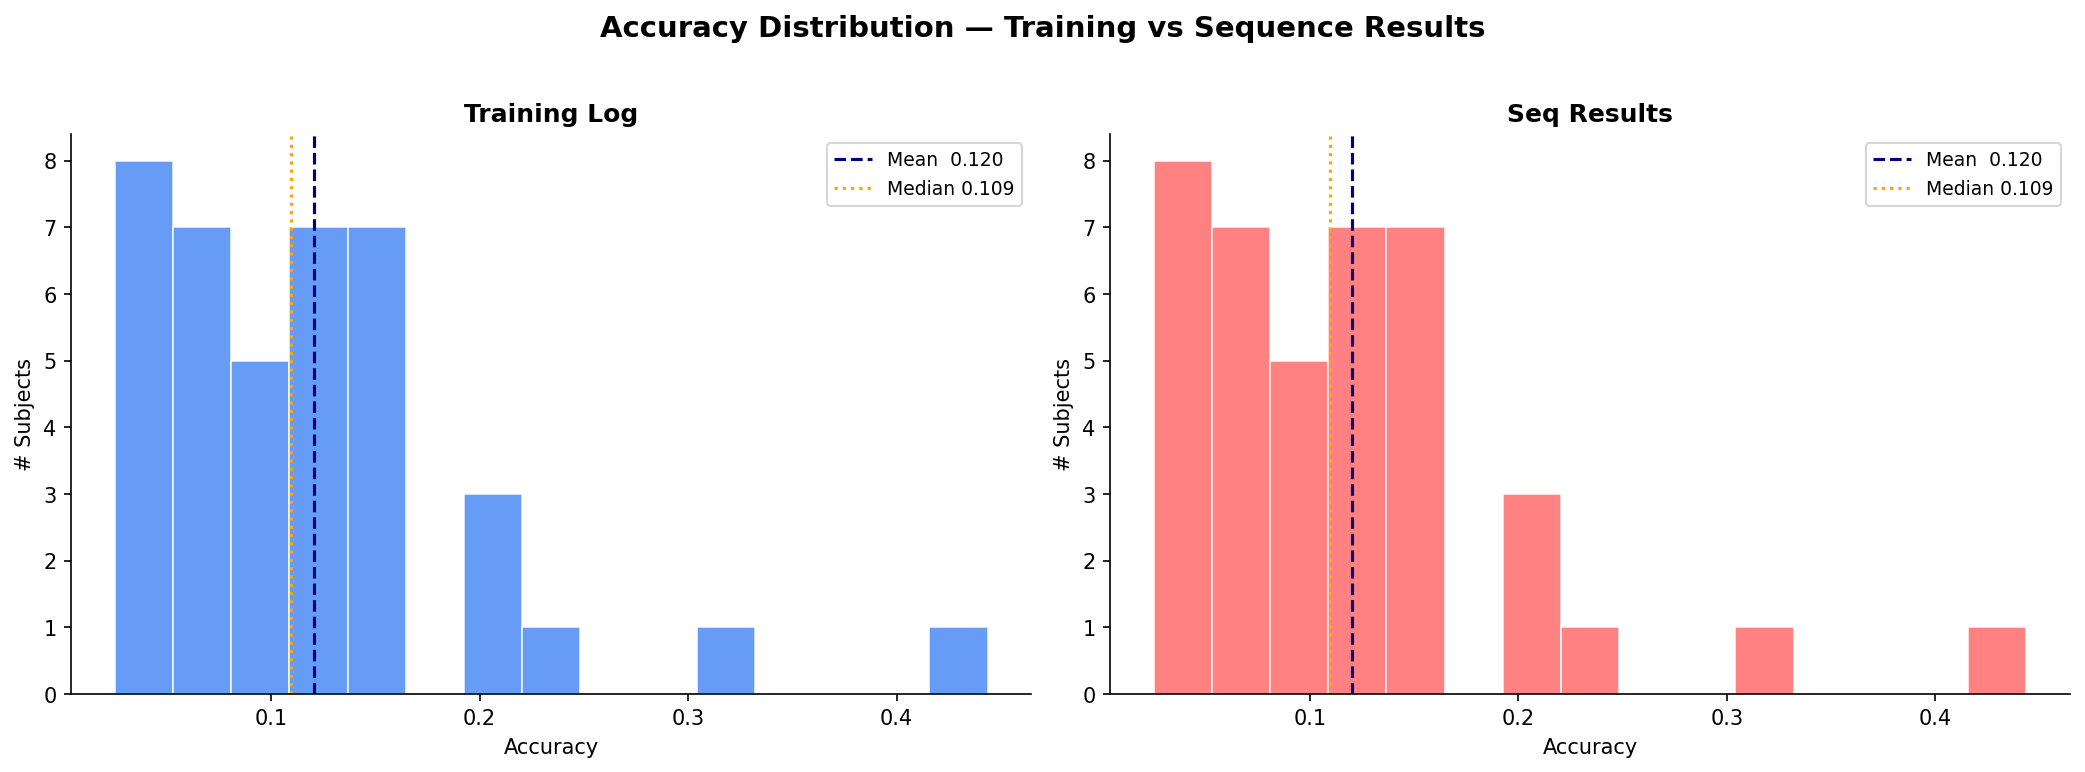

Saved: fig_accuracy_distribution.png


In [6]:
BLUE  = '#4C8BF5'
CORAL = '#FF6B6B'
GREEN = '#2EC27E'
GOLD  = '#F5A623'
PURPLE = '#A855F7'

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Accuracy Distribution — Training vs Sequence Results', fontsize=14, fontweight='bold', y=1.02)

for ax, df, color, title in zip(
    axes,
    [train_df, seq_df],
    [BLUE, CORAL],
    ['Training Log', 'Seq Results']
):
    acc = df['accuracy']
    ax.hist(acc, bins=15, color=color, alpha=0.85, edgecolor='white', linewidth=0.8)
    ax.axvline(acc.mean(),   color='navy',   linestyle='--', linewidth=1.5, label=f'Mean  {acc.mean():.3f}')
    ax.axvline(acc.median(), color='orange', linestyle=':',  linewidth=1.5, label=f'Median {acc.median():.3f}')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('# Subjects')
    ax.legend(fontsize=9)
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('fig_accuracy_distribution.png', bbox_inches='tight')
plt.show()
print('Saved: fig_accuracy_distribution.png')

## 5. Per-Subject Accuracy — Sorted Bar Chart

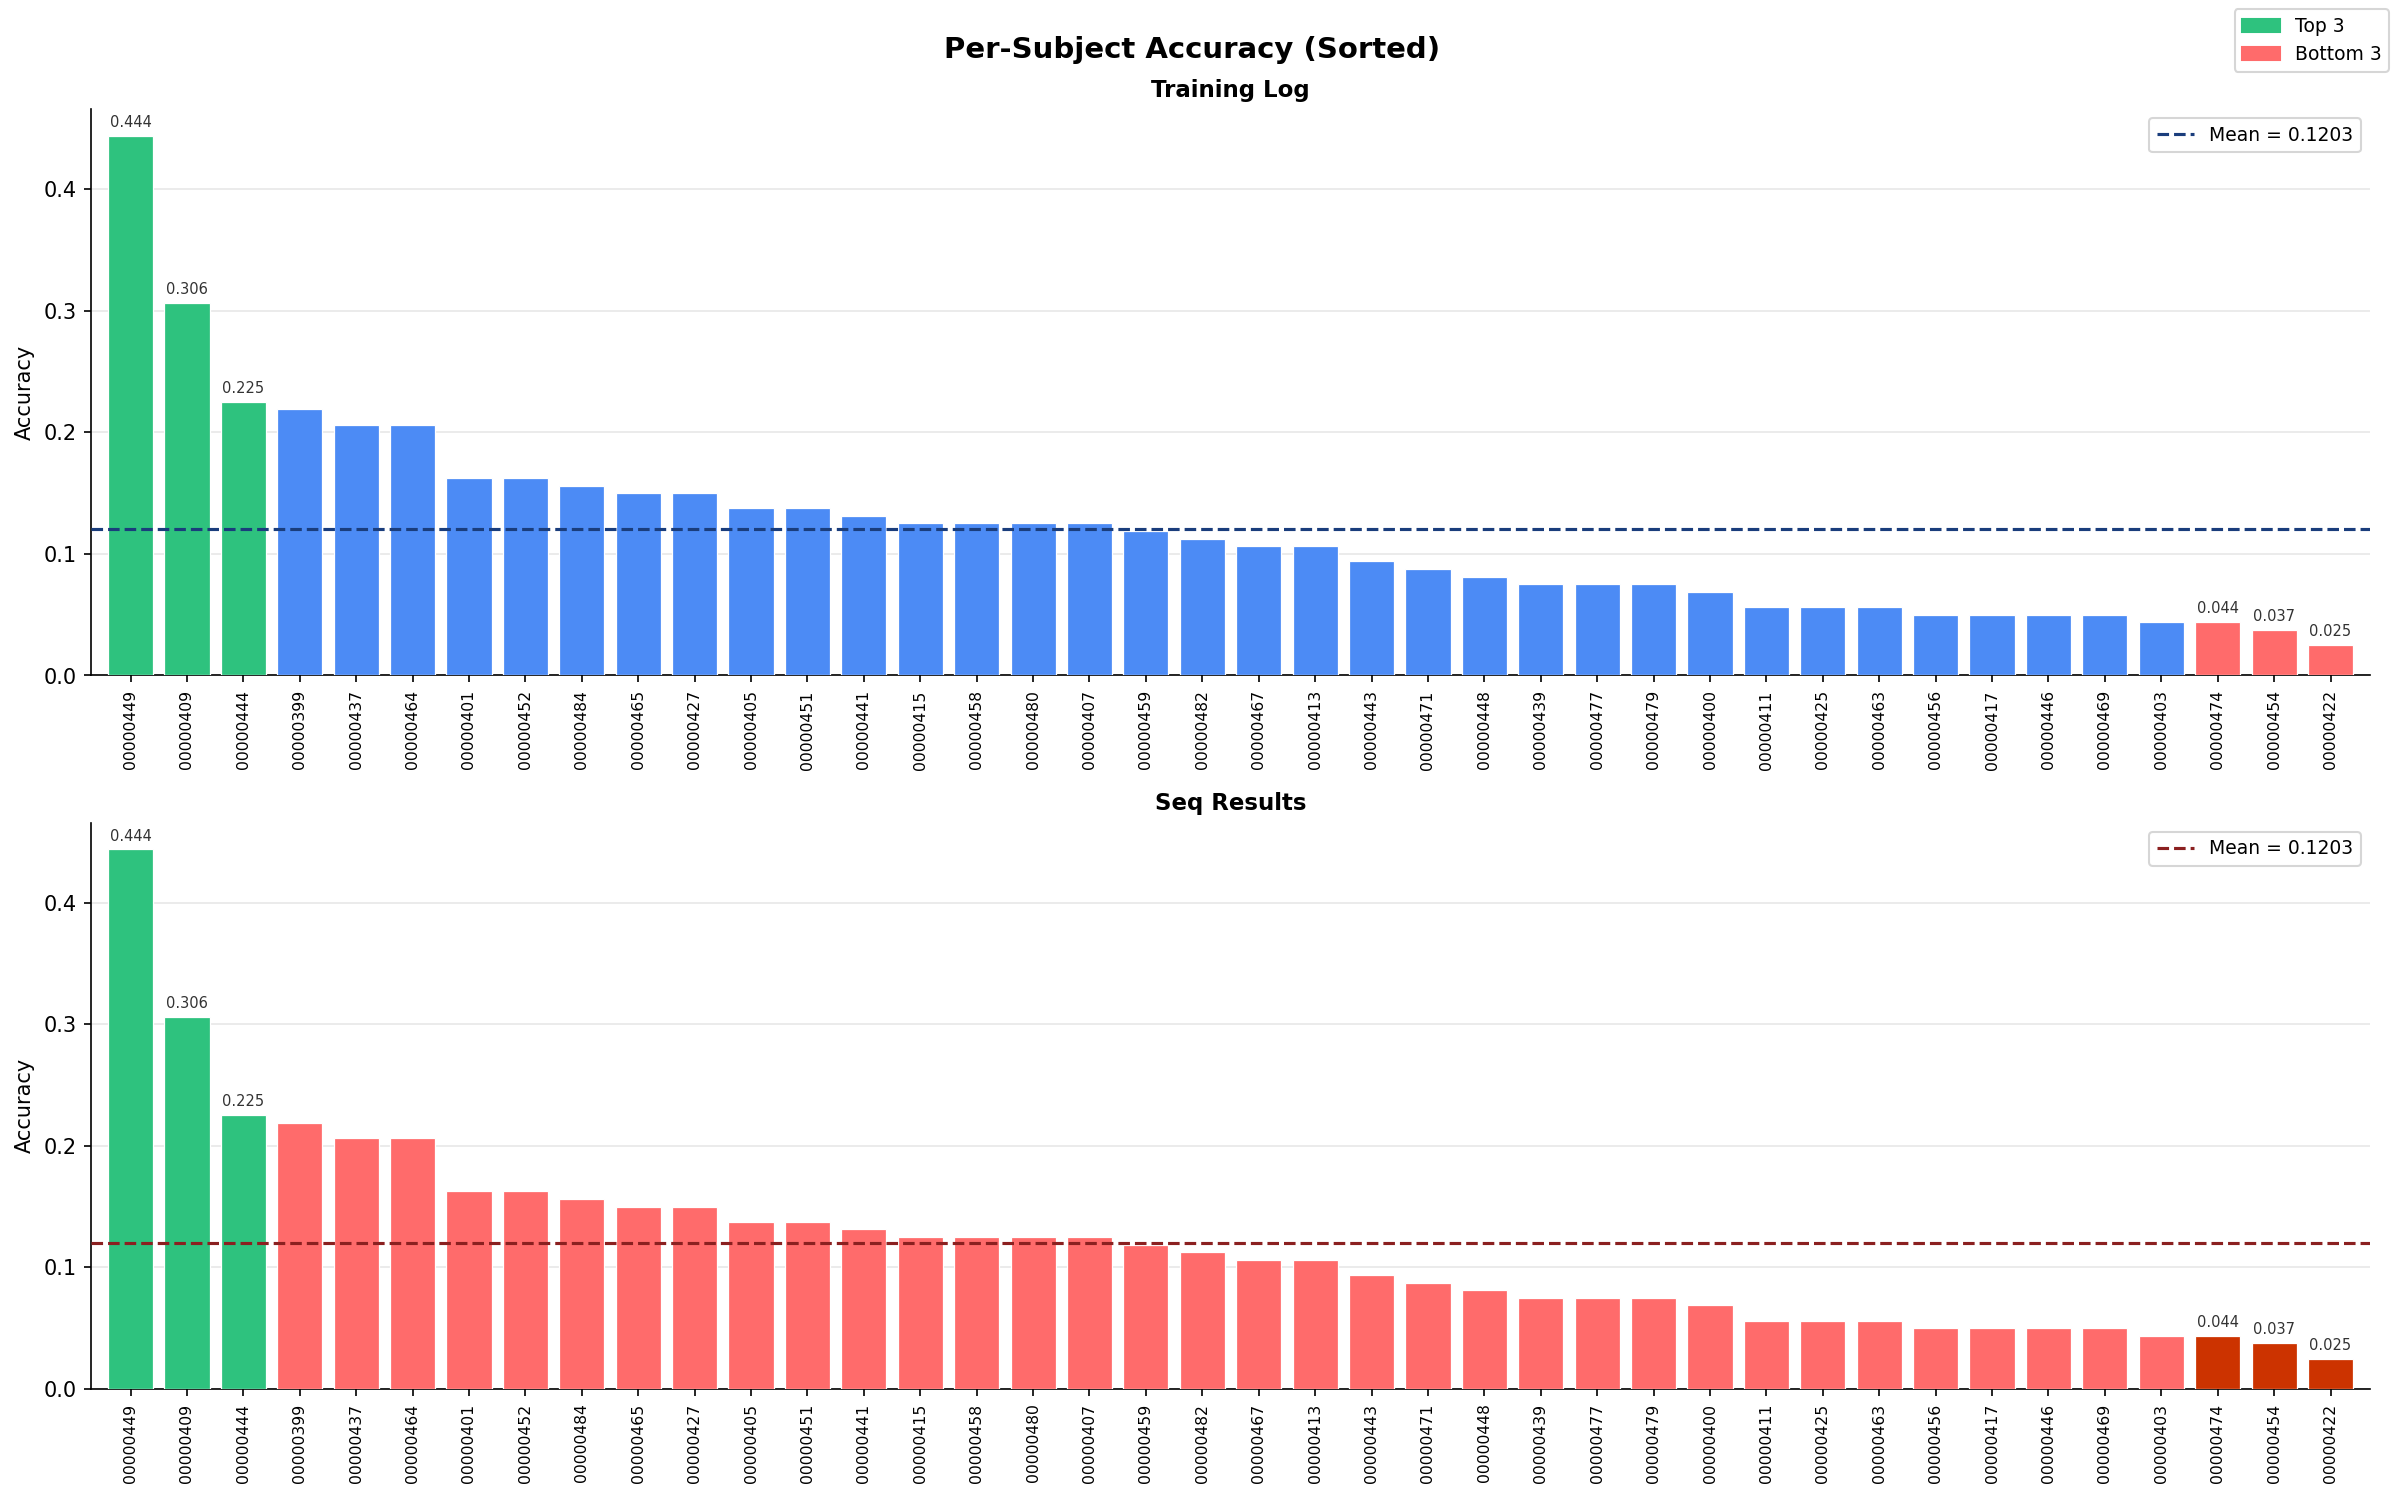

Saved: fig_per_subject_accuracy.png


In [7]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Per-Subject Accuracy (Sorted)', fontsize=14, fontweight='bold')

for ax, df, color, title, mean_color in zip(
    axes,
    [train_df.sort_values('accuracy', ascending=False),
     seq_df.sort_values('accuracy', ascending=False)],
    [BLUE, CORAL],
    ['Training Log', 'Seq Results'],
    ['#1a3d7c', '#8b2020']
):
    sorted_df = df.sort_values('accuracy', ascending=False).reset_index(drop=True)
    x = range(len(sorted_df))
    
    # Color bars: top 3 green, bottom 3 red, rest blue/coral
    colors_bar = [color] * len(sorted_df)
    for i in range(min(3, len(sorted_df))):
        colors_bar[i] = GREEN
    for i in range(max(0, len(sorted_df)-3), len(sorted_df)):
        colors_bar[i] = CORAL if color == BLUE else '#cc3300'

    bars = ax.bar(x, sorted_df['accuracy'], color=colors_bar, edgecolor='white', linewidth=0.6, zorder=3)
    mean_val = sorted_df['accuracy'].mean()
    ax.axhline(mean_val, color=mean_color, linestyle='--', linewidth=1.5,
               label=f'Mean = {mean_val:.4f}', zorder=4)
    ax.set_xticks(list(x))
    ax.set_xticklabels(sorted_df['subj_short'], rotation=90, fontsize=7.5)
    ax.set_ylabel('Accuracy')
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.set_xlim(-0.7, len(sorted_df) - 0.3)
    ax.grid(axis='y', alpha=0.3, zorder=0)

    # Annotate top / bottom
    for i in [0, 1, 2, len(sorted_df)-3, len(sorted_df)-2, len(sorted_df)-1]:
        if 0 <= i < len(sorted_df):
            v = sorted_df['accuracy'].iloc[i]
            ax.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=7, color='#333')

top_patch    = mpatches.Patch(color=GREEN,              label='Top 3')
bottom_patch = mpatches.Patch(color=CORAL,              label='Bottom 3')
fig.legend(handles=[top_patch, bottom_patch], loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('fig_per_subject_accuracy.png', bbox_inches='tight')
plt.show()
print('Saved: fig_per_subject_accuracy.png')

## 6. Loss vs Accuracy Scatter

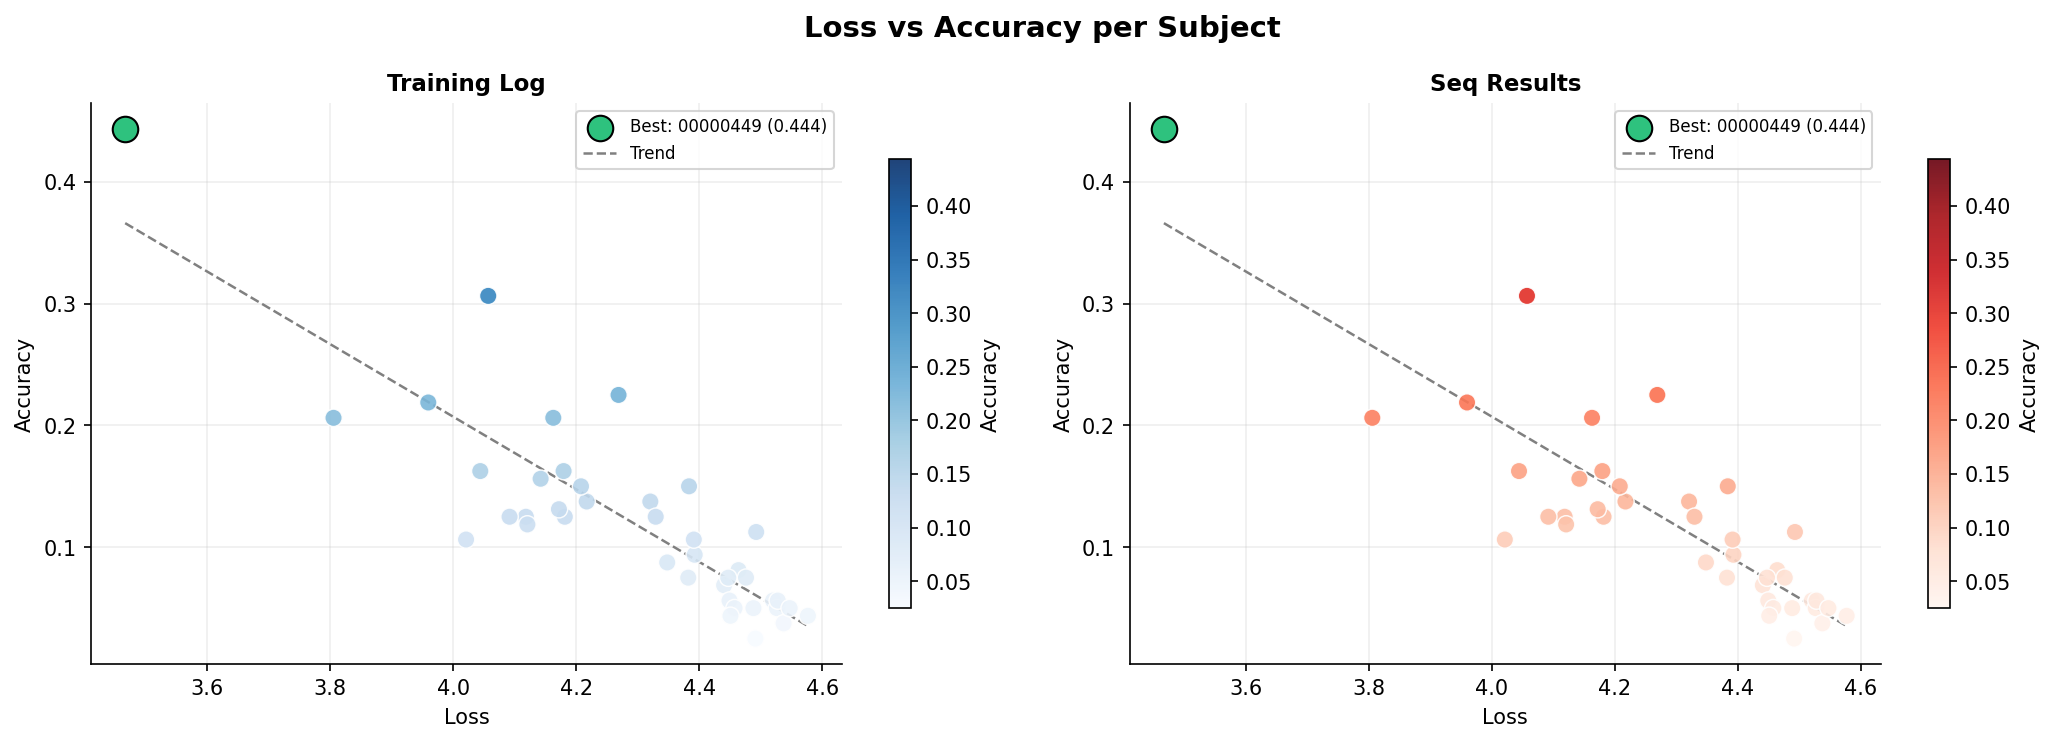

Saved: fig_loss_vs_accuracy.png


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Loss vs Accuracy per Subject', fontsize=14, fontweight='bold')

for ax, df, cmap_name, title in zip(
    axes,
    [train_df, seq_df],
    ['Blues', 'Reds'],
    ['Training Log', 'Seq Results']
):
    sc = ax.scatter(
        df['loss'], df['accuracy'],
        c=df['accuracy'],
        cmap=cmap_name, s=70, edgecolors='white', linewidth=0.7, alpha=0.9, zorder=3
    )
    # Highlight best subject
    best = df.loc[df['accuracy'].idxmax()]
    ax.scatter(best['loss'], best['accuracy'], s=150, color=GREEN, zorder=5,
               edgecolors='black', linewidth=1, label=f"Best: {best['subj_short']} ({best['accuracy']:.3f})")
    # Trend line
    z = np.polyfit(df['loss'], df['accuracy'], 1)
    p = np.poly1d(z)
    x_range = np.linspace(df['loss'].min(), df['loss'].max(), 100)
    ax.plot(x_range, p(x_range), '--', color='grey', linewidth=1.2, label='Trend')
    
    plt.colorbar(sc, ax=ax, shrink=0.8, label='Accuracy')
    ax.set_xlabel('Loss')
    ax.set_ylabel('Accuracy')
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.2, zorder=0)

plt.tight_layout()
plt.savefig('fig_loss_vs_accuracy.png', bbox_inches='tight')
plt.show()
print('Saved: fig_loss_vs_accuracy.png')

## 7. Per-Subject Loss Heatmap

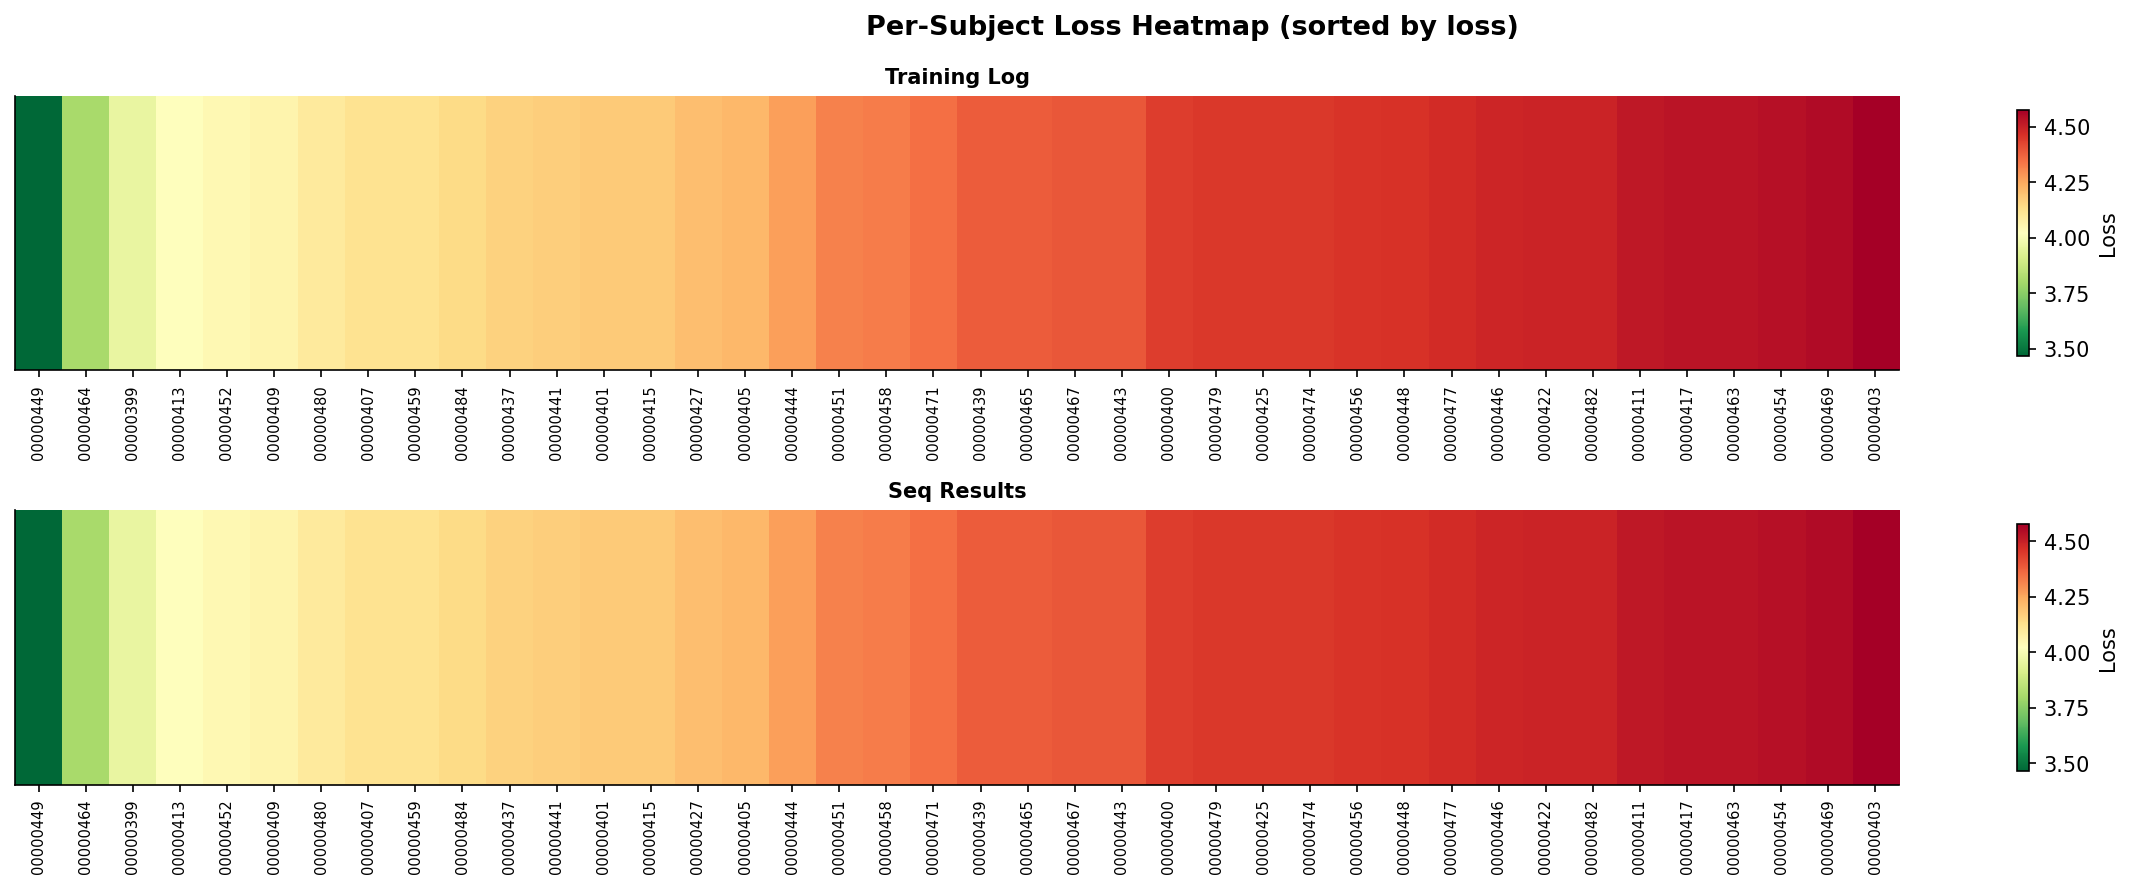

Saved: fig_loss_heatmap.png


In [9]:
fig, axes = plt.subplots(2, 1, figsize=(16, 6))
fig.suptitle('Per-Subject Loss Heatmap (sorted by loss)', fontsize=13, fontweight='bold')

for ax, df, title in zip(
    axes,
    [train_df.sort_values('loss'), seq_df.sort_values('loss')],
    ['Training Log', 'Seq Results']
):
    sorted_df = df.sort_values('loss').reset_index(drop=True)
    data = sorted_df['loss'].values.reshape(1, -1)
    im = ax.imshow(data, aspect='auto', cmap='RdYlGn_r', vmin=data.min(), vmax=data.max())
    ax.set_xticks(range(len(sorted_df)))
    ax.set_xticklabels(sorted_df['subj_short'], rotation=90, fontsize=7)
    ax.set_yticks([])
    ax.set_title(title, fontsize=10, fontweight='bold')
    plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.9, label='Loss')

plt.tight_layout()
plt.savefig('fig_loss_heatmap.png', bbox_inches='tight')
plt.show()
print('Saved: fig_loss_heatmap.png')

## 8. Elapsed Time & Throughput Analysis

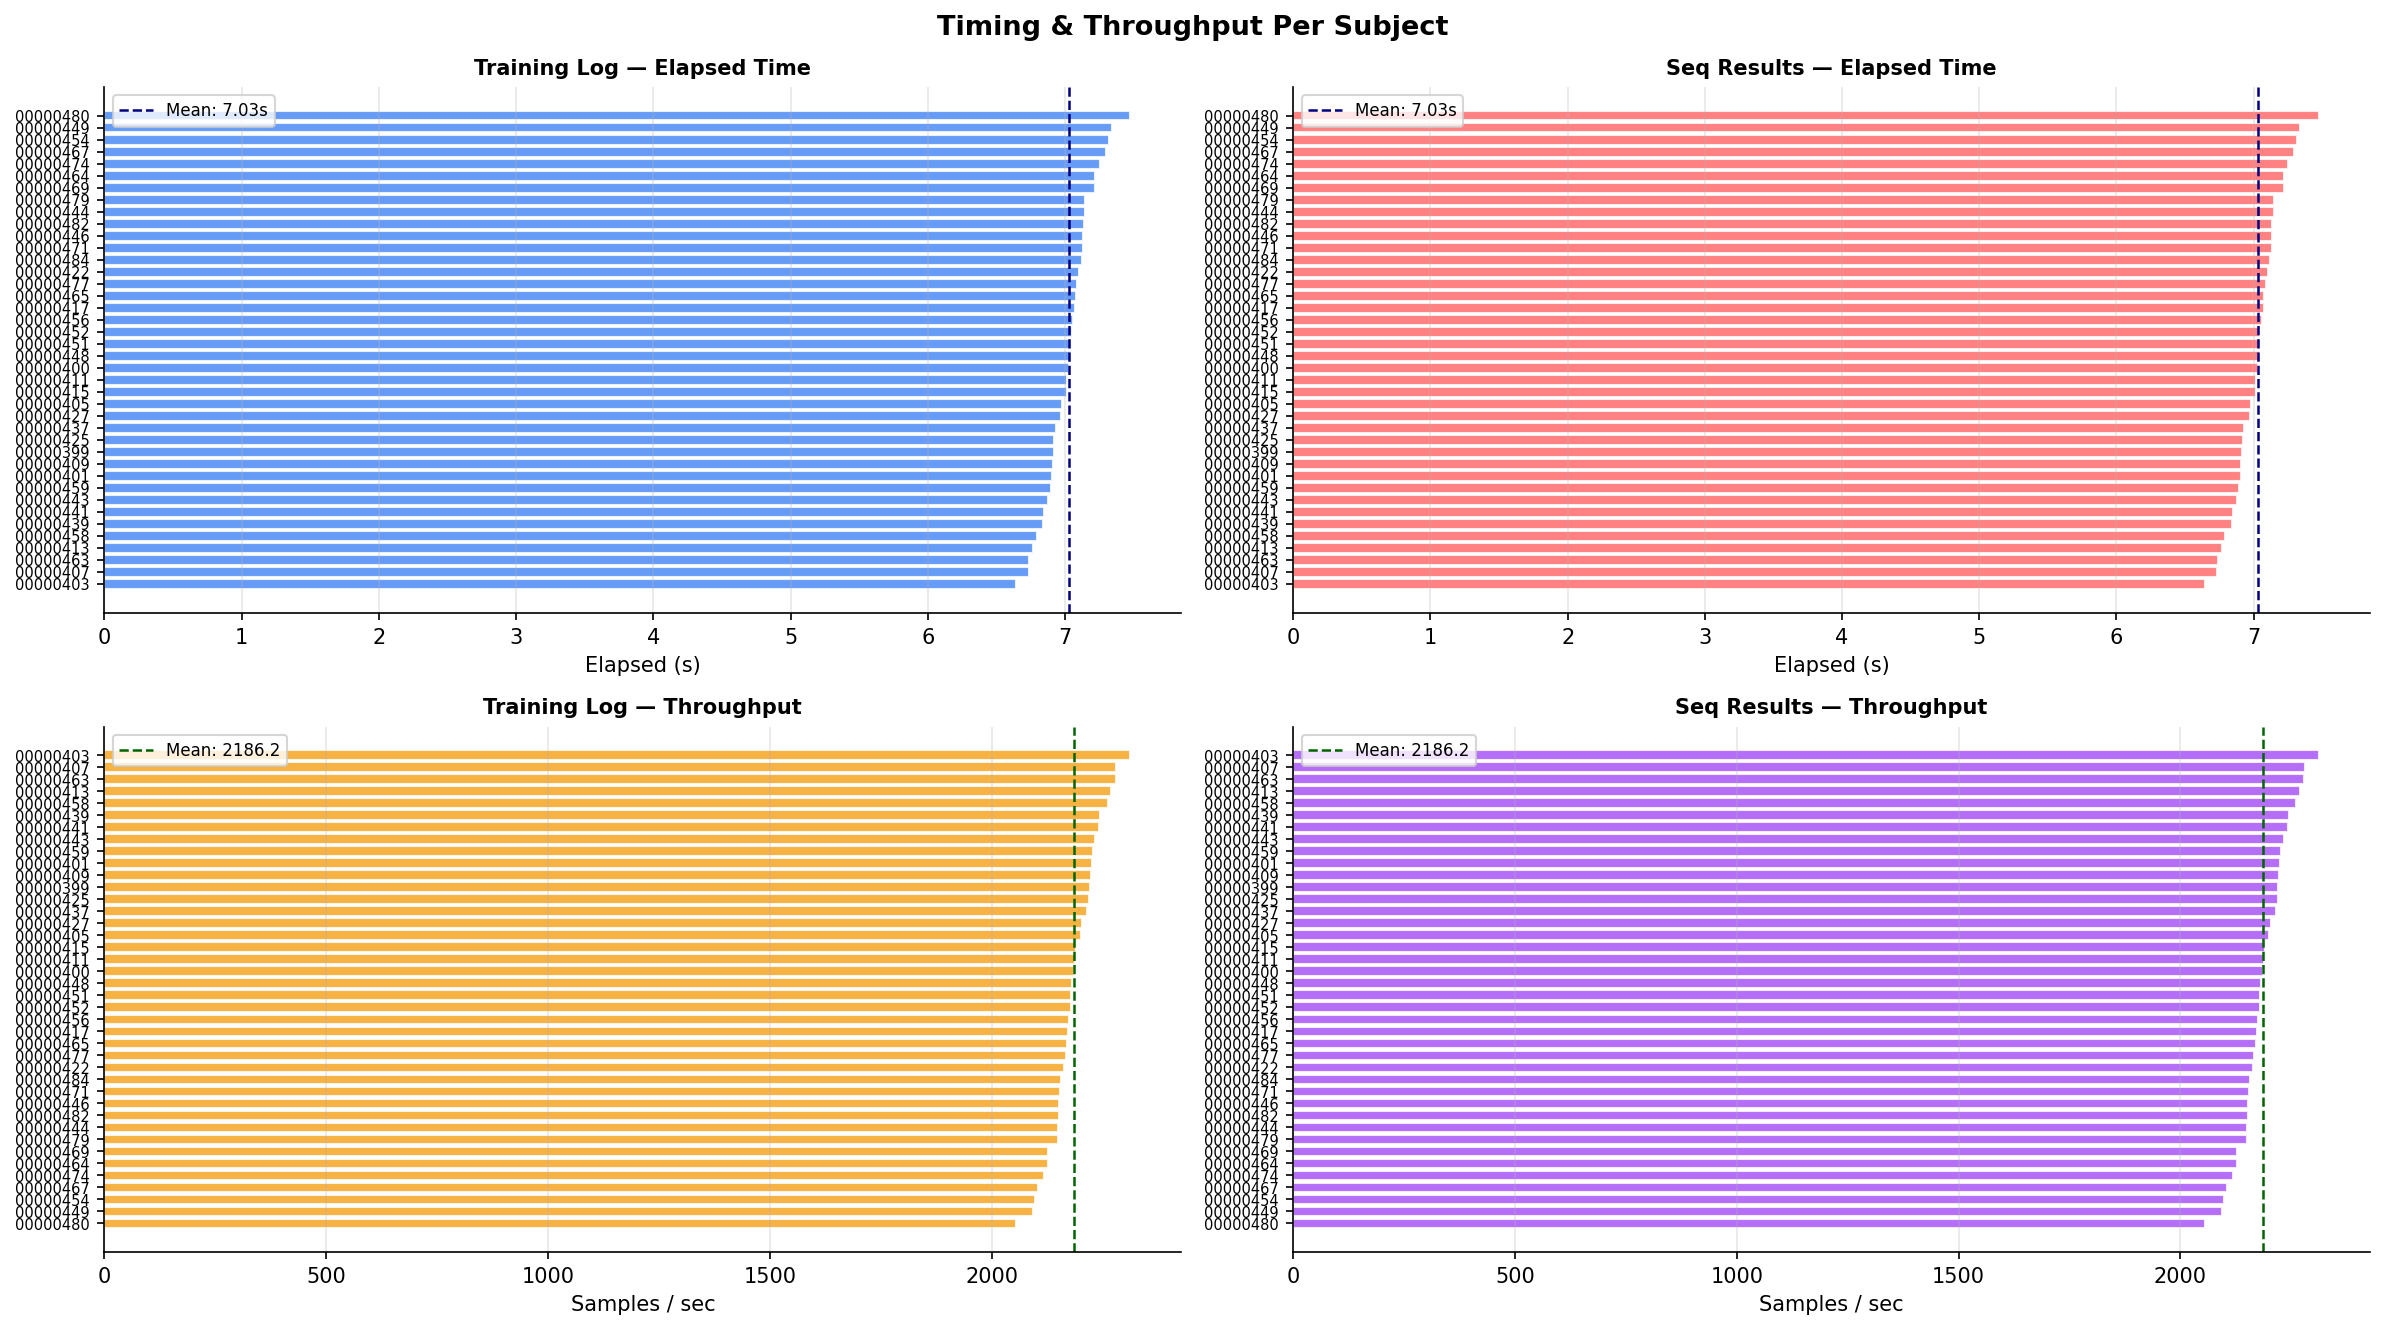

Saved: fig_timing_throughput.png


In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))
fig.suptitle('Timing & Throughput Per Subject', fontsize=13, fontweight='bold')

datasets = [
    (train_df, 'Training Log', BLUE,  GOLD),
    (seq_df,   'Seq Results',  CORAL, PURPLE),
]

for col_idx, (df, title, elapsed_col, sps_col) in enumerate(datasets):
    # ── Elapsed time
    ax_e = axes[0][col_idx]
    sorted_e = df.sort_values('elapsed_s')
    ax_e.barh(sorted_e['subj_short'], sorted_e['elapsed_s'], color=elapsed_col, alpha=0.85, edgecolor='white')
    ax_e.axvline(df['elapsed_s'].mean(), color='navy', linestyle='--', linewidth=1.2,
                 label=f"Mean: {df['elapsed_s'].mean():.2f}s")
    ax_e.set_xlabel('Elapsed (s)')
    ax_e.set_title(f'{title} — Elapsed Time', fontsize=10, fontweight='bold')
    ax_e.legend(fontsize=8)
    ax_e.tick_params(axis='y', labelsize=7)
    ax_e.grid(axis='x', alpha=0.3)

    # ── Samples per second
    ax_s = axes[1][col_idx]
    sorted_s = df.sort_values('samples_per_sec')
    ax_s.barh(sorted_s['subj_short'], sorted_s['samples_per_sec'], color=sps_col, alpha=0.85, edgecolor='white')
    ax_s.axvline(df['samples_per_sec'].mean(), color='darkgreen', linestyle='--', linewidth=1.2,
                 label=f"Mean: {df['samples_per_sec'].mean():.1f}")
    ax_s.set_xlabel('Samples / sec')
    ax_s.set_title(f'{title} — Throughput', fontsize=10, fontweight='bold')
    ax_s.legend(fontsize=8)
    ax_s.tick_params(axis='y', labelsize=7)
    ax_s.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('fig_timing_throughput.png', bbox_inches='tight')
plt.show()
print('Saved: fig_timing_throughput.png')

## 9. Accuracy Comparison: Training vs Sequence Results (same subjects)

In [11]:
# Merge on subject_id to compare train vs seq for same subjects
merged = pd.merge(
    train_df[['subject_id', 'subj_short', 'accuracy', 'loss']].rename(
        columns={'accuracy': 'train_acc', 'loss': 'train_loss'}),
    seq_df[['subject_id', 'accuracy', 'loss']].rename(
        columns={'accuracy': 'seq_acc', 'loss': 'seq_loss'}),
    on='subject_id', how='inner'
)
merged['acc_diff']  = merged['seq_acc']  - merged['train_acc']
merged['loss_diff'] = merged['seq_loss'] - merged['train_loss']

print(f'Matched subjects: {len(merged)}')
display(merged[['subject_id', 'train_acc', 'seq_acc', 'acc_diff', 'train_loss', 'seq_loss', 'loss_diff']].round(4).head(10))

Matched subjects: 40


,subject_id,train_acc,seq_acc,acc_diff,train_loss,seq_loss,loss_diff
0,00000399-159547,0.2188,0.2188,0.0,3.9595,3.9595,0.0
1,00000400-159547,0.0688,0.0688,0.0,4.4403,4.4403,0.0
2,00000401-159547,0.1625,0.1625,0.0,4.1794,4.1794,0.0
3,00000403-159547,0.0437,0.0437,0.0,4.5766,4.5766,0.0
4,00000405-159547,0.1375,0.1375,0.0,4.2170,4.2170,0.0
5,00000407-159547,0.1250,0.1250,0.0,4.1181,4.1181,0.0
6,00000409-159547,0.3063,0.3063,0.0,4.0569,4.0569,0.0
7,00000411-159547,0.0562,0.0562,0.0,4.5199,4.5199,0.0
8,00000413-159547,0.1063,0.1063,0.0,4.0209,4.0209,0.0
9,00000415-159547,0.1250,0.1250,0.0,4.1814,4.1814,0.0


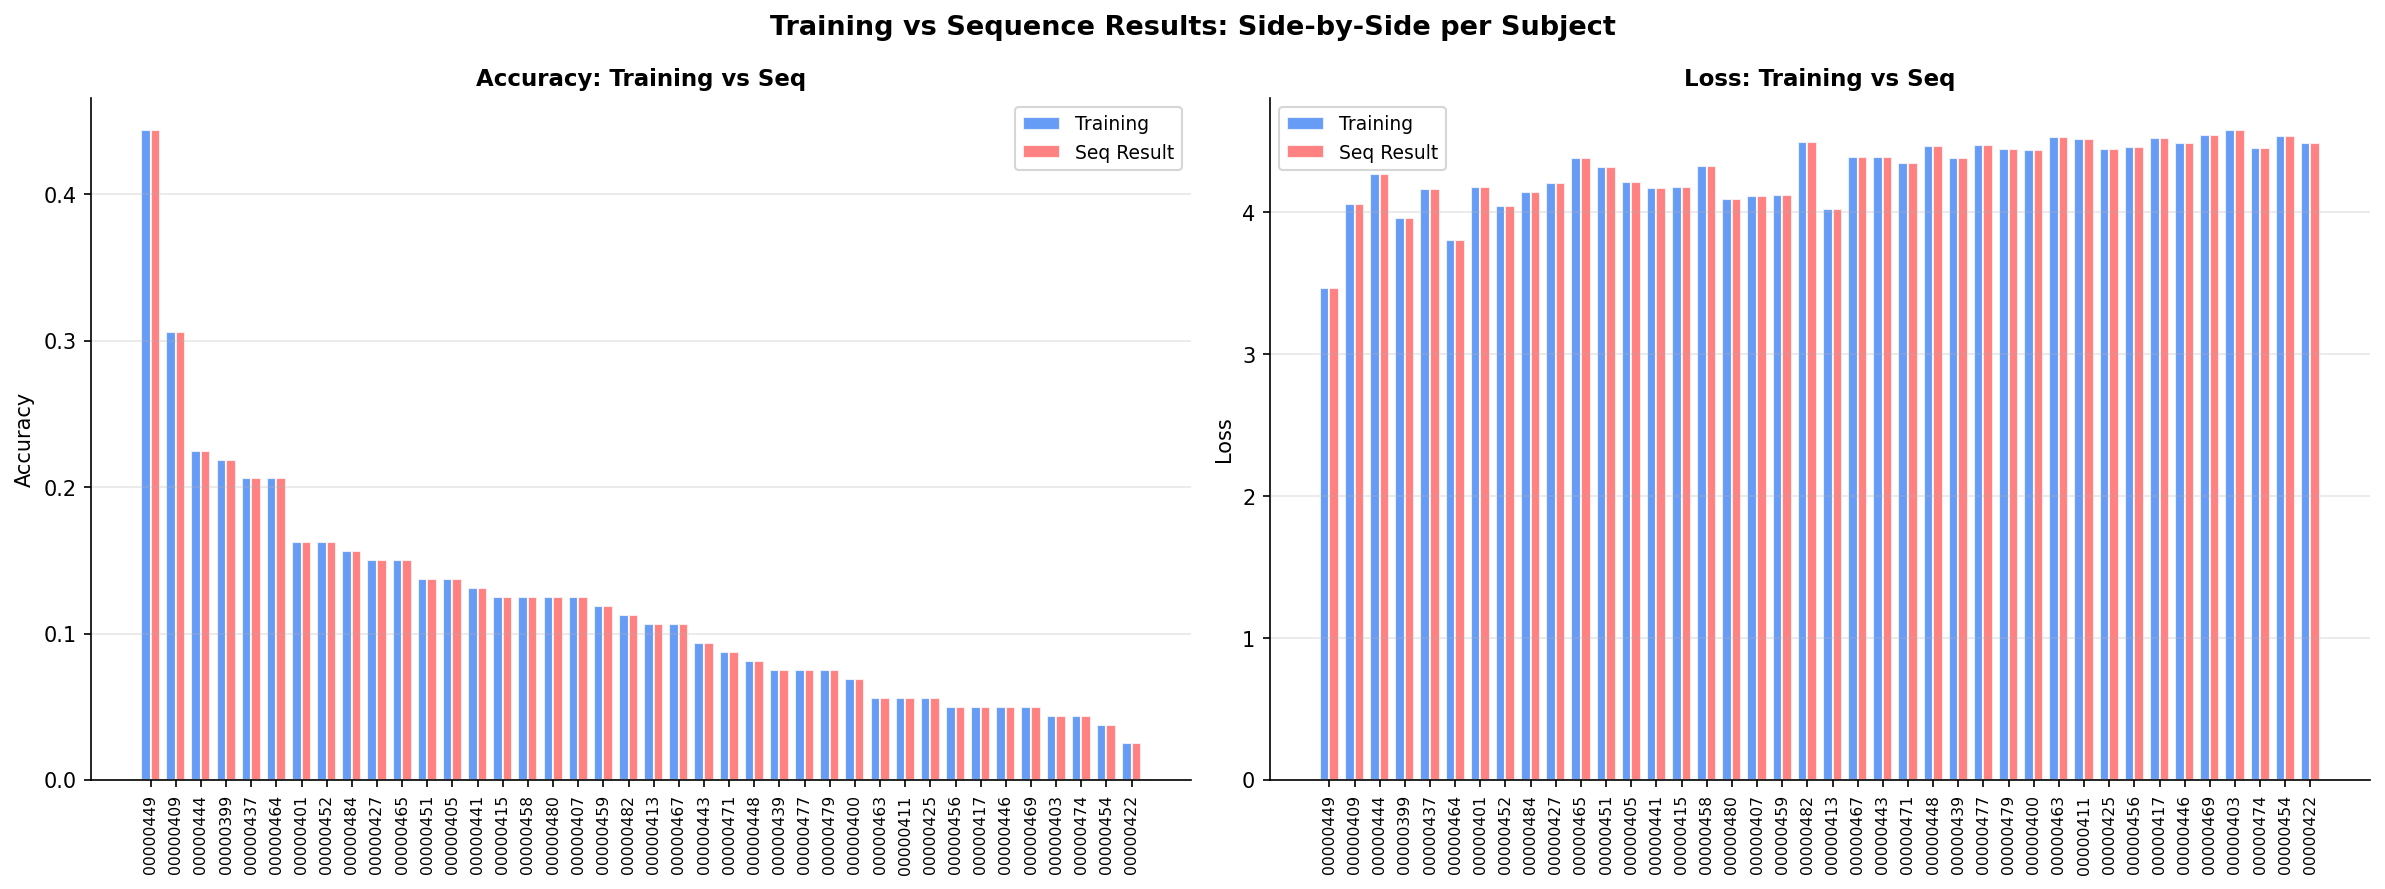

Saved: fig_train_vs_seq_comparison.png


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Training vs Sequence Results: Side-by-Side per Subject', fontsize=13, fontweight='bold')

# ── Accuracy comparison
ax = axes[0]
merged_sorted = merged.sort_values('train_acc', ascending=False).reset_index(drop=True)
x = np.arange(len(merged_sorted))
w = 0.38
b1 = ax.bar(x - w/2, merged_sorted['train_acc'], w, label='Training',   color=BLUE,  alpha=0.85, edgecolor='white')
b2 = ax.bar(x + w/2, merged_sorted['seq_acc'],   w, label='Seq Result', color=CORAL, alpha=0.85, edgecolor='white')
ax.set_xticks(x)
ax.set_xticklabels(merged_sorted['subj_short'], rotation=90, fontsize=7.5)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy: Training vs Seq', fontsize=11, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(axis='y', alpha=0.3)

# ── Loss comparison
ax2 = axes[1]
b3 = ax2.bar(x - w/2, merged_sorted['train_loss'], w, label='Training',   color=BLUE,  alpha=0.85, edgecolor='white')
b4 = ax2.bar(x + w/2, merged_sorted['seq_loss'],   w, label='Seq Result', color=CORAL, alpha=0.85, edgecolor='white')
ax2.set_xticks(x)
ax2.set_xticklabels(merged_sorted['subj_short'], rotation=90, fontsize=7.5)
ax2.set_ylabel('Loss')
ax2.set_title('Loss: Training vs Seq', fontsize=11, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('fig_train_vs_seq_comparison.png', bbox_inches='tight')
plt.show()
print('Saved: fig_train_vs_seq_comparison.png')

## 10. Accuracy Difference: Seq − Training (signed)

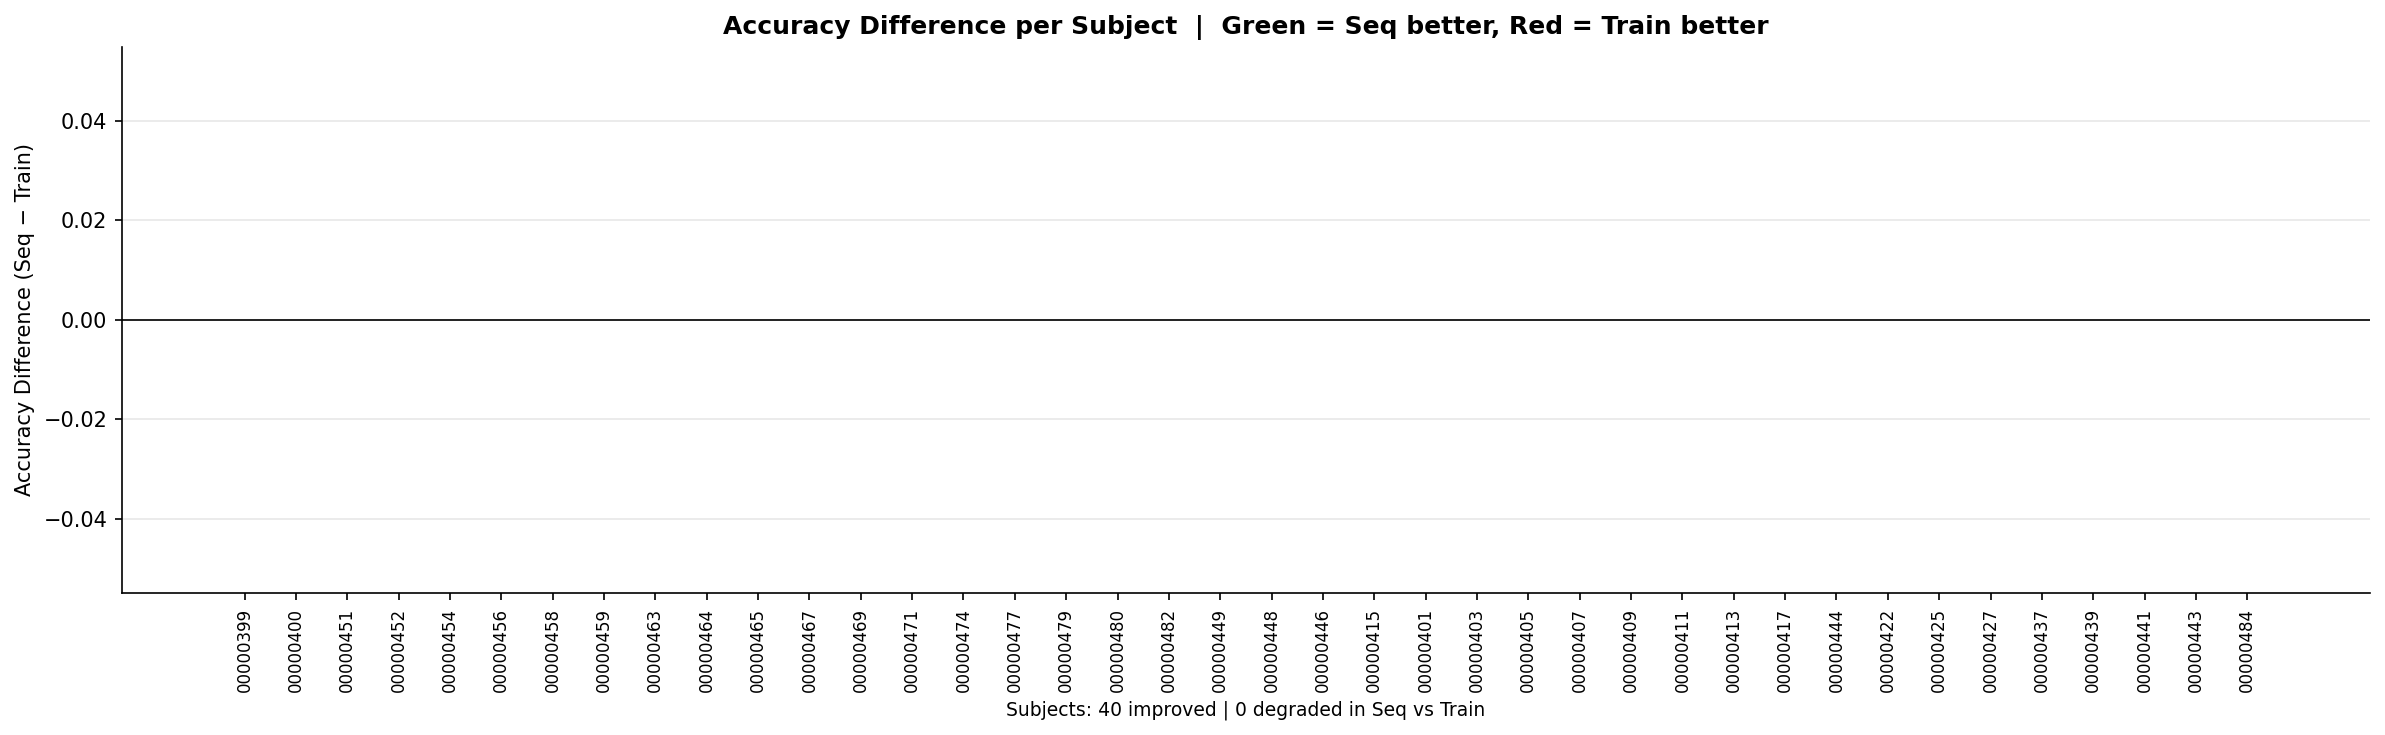

Saved: fig_accuracy_diff.png


In [13]:
fig, ax = plt.subplots(figsize=(16, 5))
merged_d = merged.sort_values('acc_diff', ascending=False).reset_index(drop=True)
colors_diff = [GREEN if v >= 0 else CORAL for v in merged_d['acc_diff']]

ax.bar(range(len(merged_d)), merged_d['acc_diff'], color=colors_diff, edgecolor='white', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.8)
ax.set_xticks(range(len(merged_d)))
ax.set_xticklabels(merged_d['subj_short'], rotation=90, fontsize=8)
ax.set_ylabel('Accuracy Difference (Seq − Train)')
ax.set_title('Accuracy Difference per Subject  |  Green = Seq better, Red = Train better',
             fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

pos_count = (merged_d['acc_diff'] >= 0).sum()
neg_count = (merged_d['acc_diff'] < 0).sum()
ax.set_xlabel(f'Subjects: {pos_count} improved | {neg_count} degraded in Seq vs Train', fontsize=9)

plt.tight_layout()
plt.savefig('fig_accuracy_diff.png', bbox_inches='tight')
plt.show()
print('Saved: fig_accuracy_diff.png')

## 11. Accuracy Bins / Tier Analysis

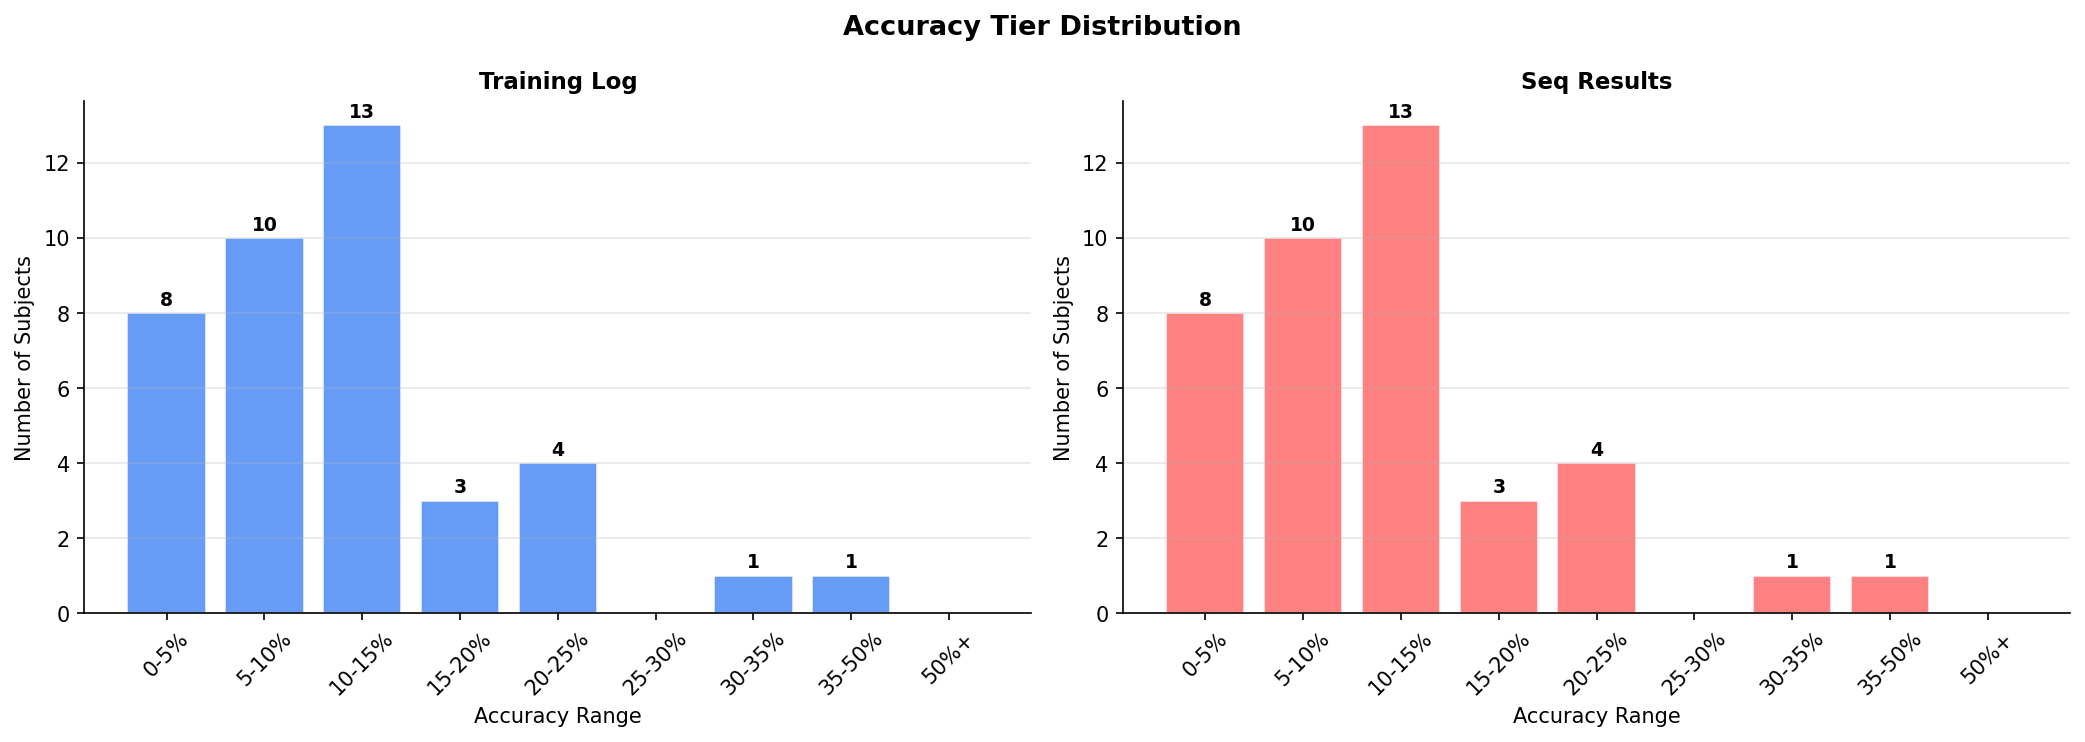

Saved: fig_accuracy_tiers.png


In [14]:
bins   = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.50, 1.0]
labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%', '30-35%', '35-50%', '50%+']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Accuracy Tier Distribution', fontsize=13, fontweight='bold')

for ax, df, color, title in zip(
    axes,
    [train_df, seq_df],
    [BLUE, CORAL],
    ['Training Log', 'Seq Results']
):
    tier = pd.cut(df['accuracy'], bins=bins, labels=labels, right=True)
    counts = tier.value_counts().reindex(labels, fill_value=0)
    bars = ax.bar(counts.index, counts.values, color=color, alpha=0.85, edgecolor='white', linewidth=0.8)
    for bar, val in zip(bars, counts.values):
        if val > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax.set_xlabel('Accuracy Range')
    ax.set_ylabel('Number of Subjects')
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('fig_accuracy_tiers.png', bbox_inches='tight')
plt.show()
print('Saved: fig_accuracy_tiers.png')

## 12. Correlation Matrix

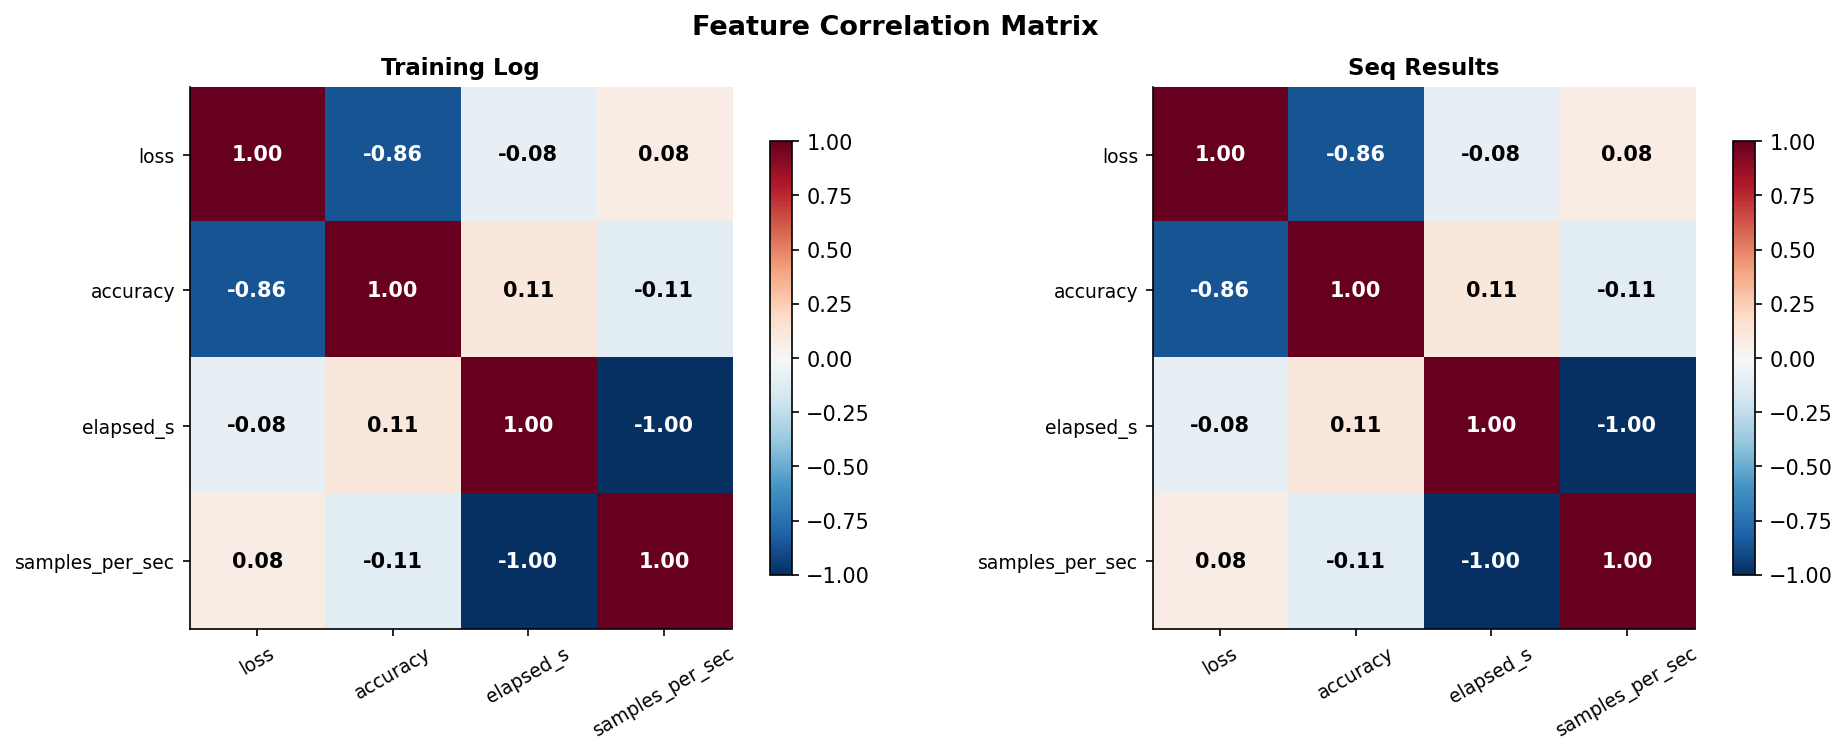

Saved: fig_correlation_matrix.png


In [15]:
numeric_cols = ['loss', 'accuracy', 'elapsed_s', 'samples_per_sec']

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Feature Correlation Matrix', fontsize=13, fontweight='bold')

for ax, df, title in zip(
    axes,
    [train_df, seq_df],
    ['Training Log', 'Seq Results']
):
    corr = df[numeric_cols].corr()
    im = ax.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1)
    ax.set_xticks(range(len(numeric_cols)))
    ax.set_yticks(range(len(numeric_cols)))
    ax.set_xticklabels(numeric_cols, rotation=30, fontsize=9)
    ax.set_yticklabels(numeric_cols, fontsize=9)
    ax.set_title(title, fontsize=11, fontweight='bold')
    plt.colorbar(im, ax=ax, shrink=0.8)
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            val = corr.iloc[i, j]
            ax.text(j, i, f'{val:.2f}', ha='center', va='center',
                    fontsize=10, color='white' if abs(val) > 0.6 else 'black', fontweight='bold')

plt.tight_layout()
plt.savefig('fig_correlation_matrix.png', bbox_inches='tight')
plt.show()
print('Saved: fig_correlation_matrix.png')

## 13. Dashboard — All Key Metrics in One View

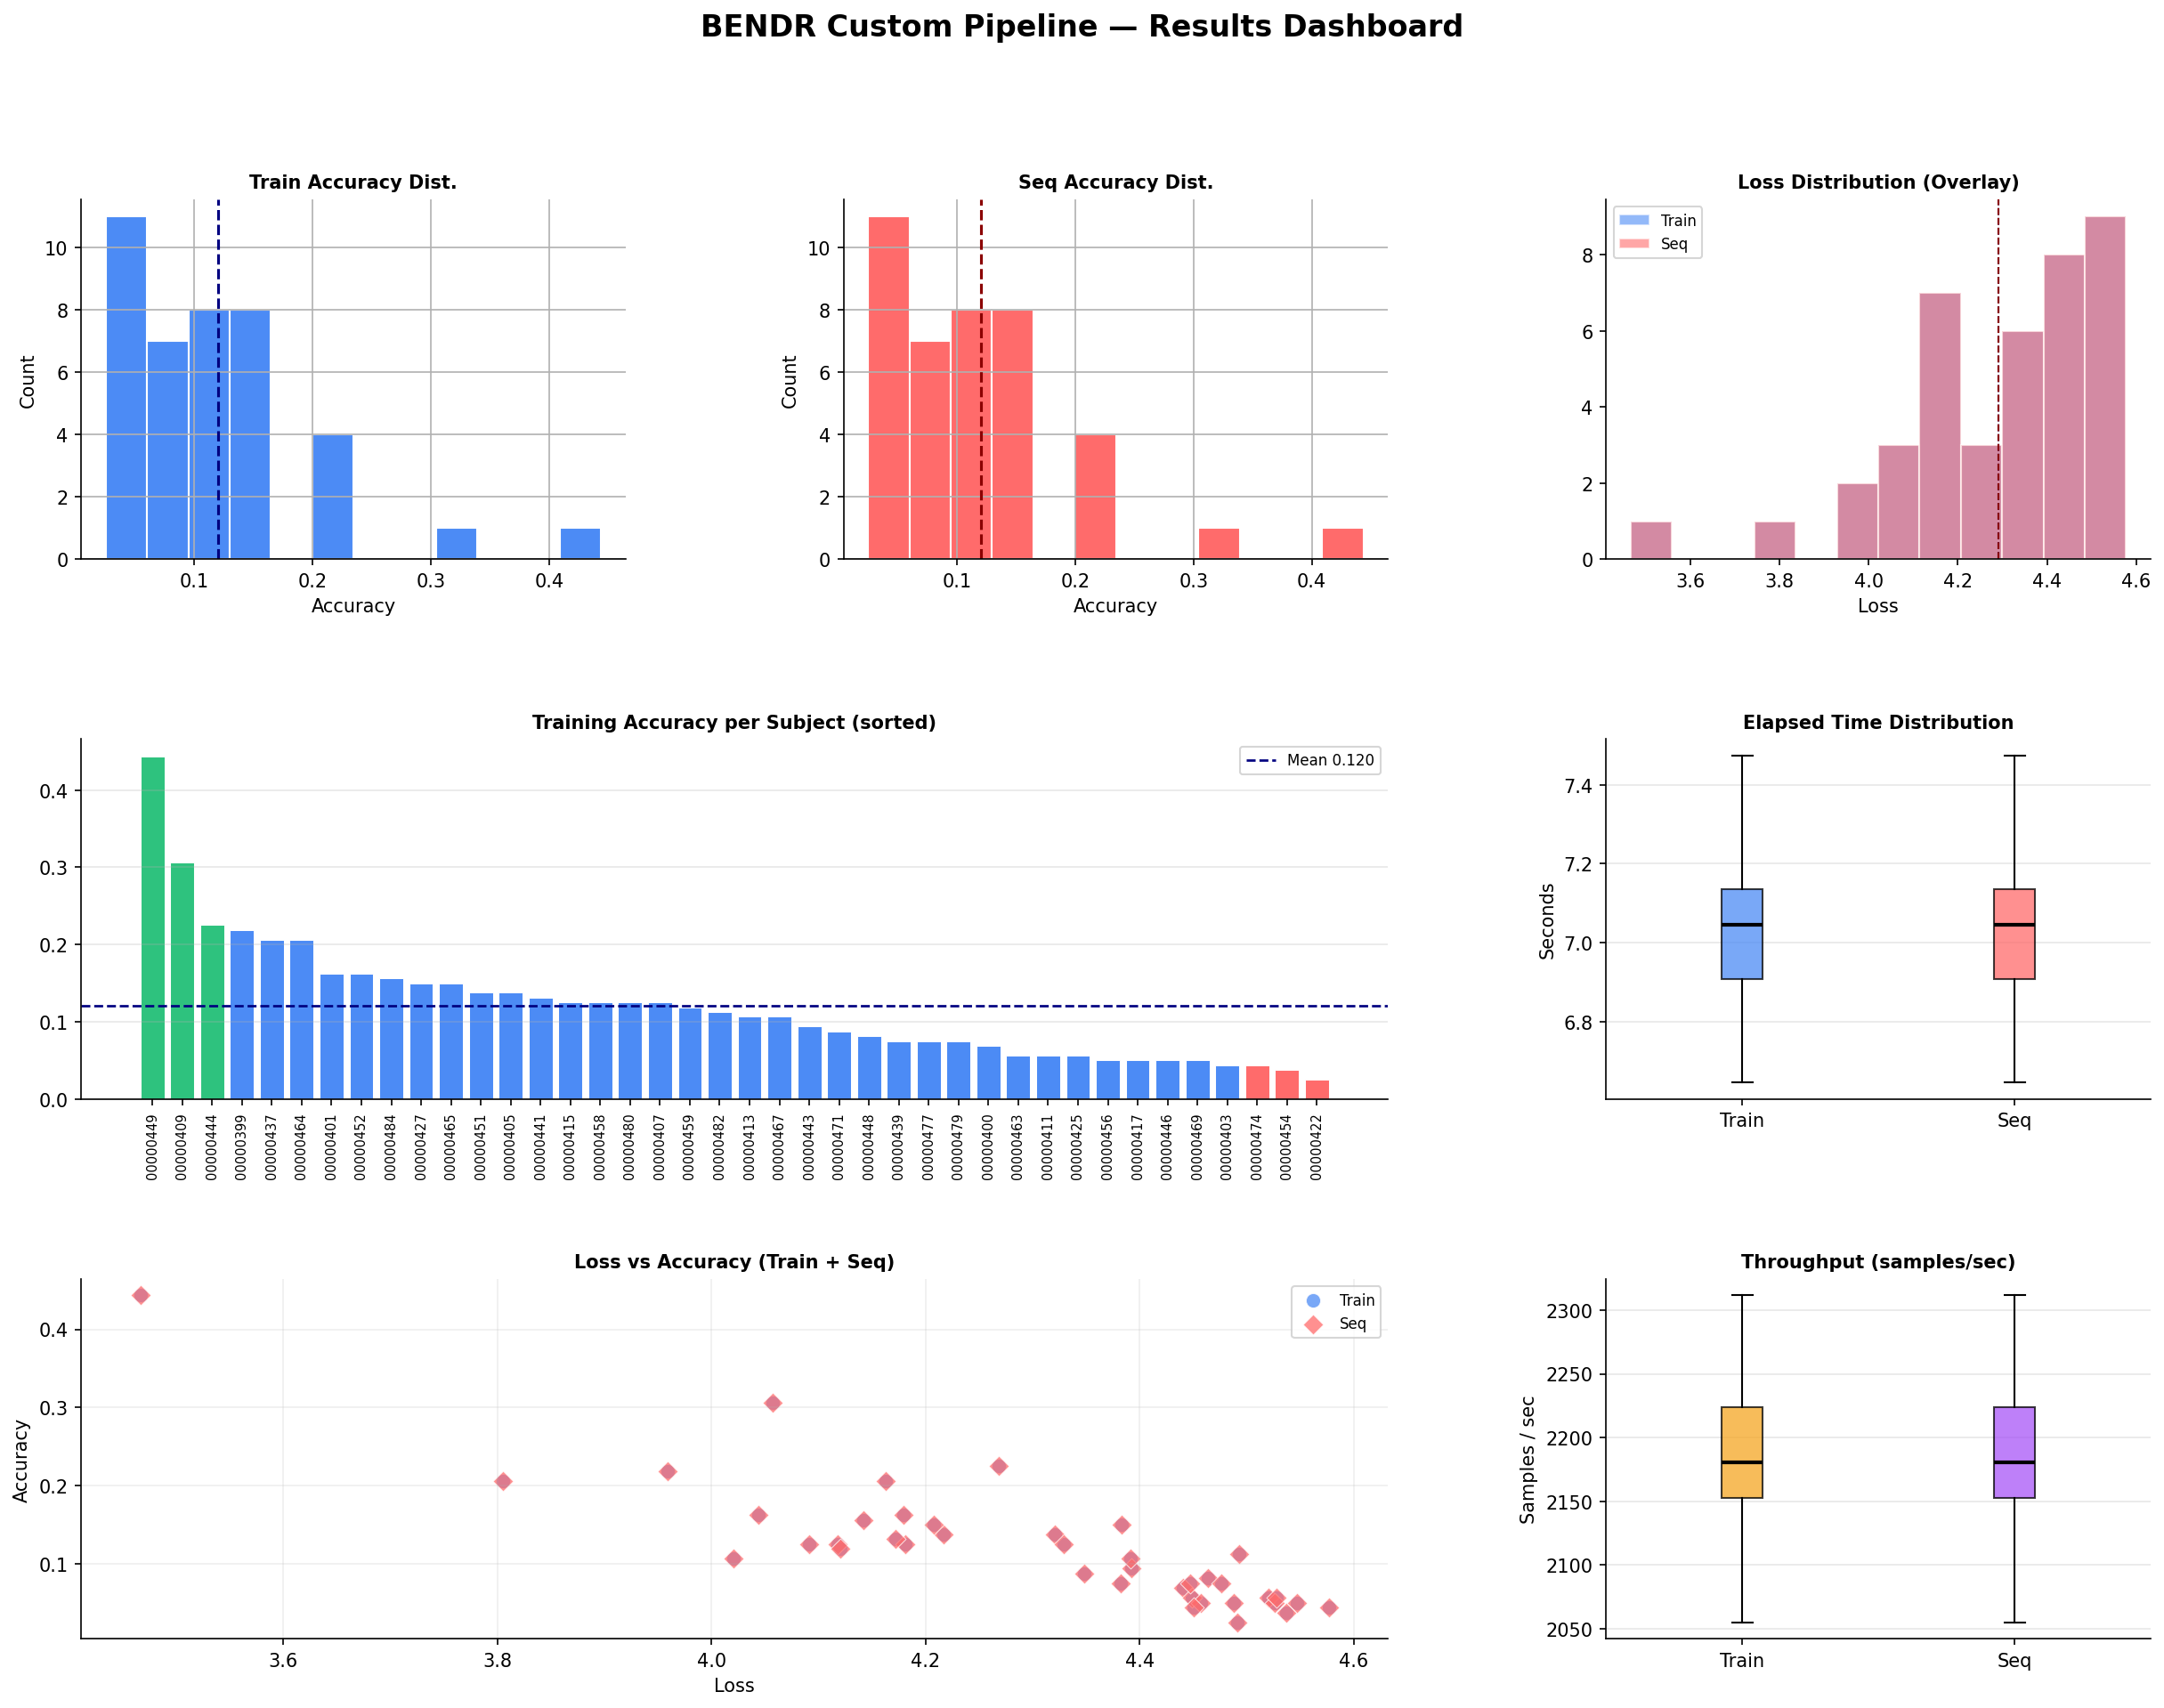

Saved: fig_dashboard.png


In [16]:
fig = plt.figure(figsize=(20, 14))
gs  = GridSpec(3, 3, figure=fig, hspace=0.50, wspace=0.40)
fig.suptitle('BENDR Custom Pipeline — Results Dashboard', fontsize=16, fontweight='bold', y=0.98)

# ── (0,0) Accuracy hist - training
ax0 = fig.add_subplot(gs[0, 0])
train_df['accuracy'].hist(bins=12, ax=ax0, color=BLUE, edgecolor='white')
ax0.axvline(train_df['accuracy'].mean(), color='navy', linestyle='--', linewidth=1.5)
ax0.set_title('Train Accuracy Dist.', fontsize=10, fontweight='bold')
ax0.set_xlabel('Accuracy'); ax0.set_ylabel('Count')

# ── (0,1) Accuracy hist - seq
ax1 = fig.add_subplot(gs[0, 1])
seq_df['accuracy'].hist(bins=12, ax=ax1, color=CORAL, edgecolor='white')
ax1.axvline(seq_df['accuracy'].mean(), color='darkred', linestyle='--', linewidth=1.5)
ax1.set_title('Seq Accuracy Dist.', fontsize=10, fontweight='bold')
ax1.set_xlabel('Accuracy'); ax1.set_ylabel('Count')

# ── (0,2) Loss hist overlay
ax2 = fig.add_subplot(gs[0, 2])
ax2.hist(train_df['loss'], bins=12, color=BLUE, alpha=0.6, edgecolor='white', label='Train')
ax2.hist(seq_df['loss'],   bins=12, color=CORAL, alpha=0.6, edgecolor='white', label='Seq')
ax2.axvline(train_df['loss'].mean(), color='navy',    linestyle='--', linewidth=1)
ax2.axvline(seq_df['loss'].mean(),   color='darkred', linestyle='--', linewidth=1)
ax2.set_title('Loss Distribution (Overlay)', fontsize=10, fontweight='bold')
ax2.set_xlabel('Loss'); ax2.legend(fontsize=8)

# ── (1,0-1) Accuracy bar - training sorted
ax3 = fig.add_subplot(gs[1, :2])
t = train_df.sort_values('accuracy', ascending=False).reset_index(drop=True)
bar_colors = [GREEN if i < 3 else (CORAL if i >= len(t)-3 else BLUE) for i in range(len(t))]
ax3.bar(range(len(t)), t['accuracy'], color=bar_colors, edgecolor='white', linewidth=0.5)
ax3.axhline(t['accuracy'].mean(), color='navy', linestyle='--', linewidth=1.3,
            label=f"Mean {t['accuracy'].mean():.3f}")
ax3.set_xticks(range(len(t)))
ax3.set_xticklabels(t['subj_short'], rotation=90, fontsize=7)
ax3.set_title('Training Accuracy per Subject (sorted)', fontsize=10, fontweight='bold')
ax3.legend(fontsize=8); ax3.grid(axis='y', alpha=0.3)

# ── (1,2) Elapsed time box plot
ax4 = fig.add_subplot(gs[1, 2])
bp = ax4.boxplot(
    [train_df['elapsed_s'], seq_df['elapsed_s']],
    labels=['Train', 'Seq'],
    patch_artist=True,
    medianprops=dict(color='black', linewidth=2)
)
for patch, color in zip(bp['boxes'], [BLUE, CORAL]):
    patch.set_facecolor(color)
    patch.set_alpha(0.75)
ax4.set_title('Elapsed Time Distribution', fontsize=10, fontweight='bold')
ax4.set_ylabel('Seconds')
ax4.grid(axis='y', alpha=0.3)

# ── (2,0-1) Loss scatter vs accuracy
ax5 = fig.add_subplot(gs[2, :2])
ax5.scatter(train_df['loss'], train_df['accuracy'], color=BLUE,  alpha=0.75, s=60, label='Train', edgecolors='white', linewidth=0.5)
ax5.scatter(seq_df['loss'],   seq_df['accuracy'],   color=CORAL, alpha=0.75, s=60, label='Seq',   edgecolors='white', linewidth=0.5, marker='D')
ax5.set_xlabel('Loss'); ax5.set_ylabel('Accuracy')
ax5.set_title('Loss vs Accuracy (Train + Seq)', fontsize=10, fontweight='bold')
ax5.legend(fontsize=8); ax5.grid(alpha=0.2)

# ── (2,2) Throughput box plot
ax6 = fig.add_subplot(gs[2, 2])
bp2 = ax6.boxplot(
    [train_df['samples_per_sec'], seq_df['samples_per_sec']],
    labels=['Train', 'Seq'],
    patch_artist=True,
    medianprops=dict(color='black', linewidth=2)
)
for patch, color in zip(bp2['boxes'], [GOLD, PURPLE]):
    patch.set_facecolor(color)
    patch.set_alpha(0.75)
ax6.set_title('Throughput (samples/sec)', fontsize=10, fontweight='bold')
ax6.set_ylabel('Samples / sec')
ax6.grid(axis='y', alpha=0.3)

plt.savefig('fig_dashboard.png', bbox_inches='tight')
plt.show()
print('Saved: fig_dashboard.png')

## 14. Full Detail Table — Sorted by Accuracy

In [17]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.float_format', '{:.4f}'.format)

display_cols = ['subject_id', 'loss', 'accuracy', 'elapsed_s', 'samples_per_sec', 'acc_rank']

print('=== Training Log — Sorted by Accuracy (descending) ===')
display(train_df.sort_values('accuracy', ascending=False)[display_cols].reset_index(drop=True))

print('\n=== Seq Results — Sorted by Accuracy (descending) ===')
display(seq_df.sort_values('accuracy', ascending=False)[display_cols].reset_index(drop=True))

=== Training Log — Sorted by Accuracy (descending) ===


,subject_id,loss,accuracy,elapsed_s,samples_per_sec,acc_rank
0,00000449-159547,3.4668,0.4437,7.3400,2092.8000,1
1,00000409-159547,4.0569,0.3063,6.9100,2223.0000,2
2,00000444-159547,4.2687,0.2250,7.1450,2149.8000,3
3,00000399-159547,3.9595,0.2188,6.9180,2220.5000,4
4,00000437-159547,4.1627,0.2062,6.9320,2215.8000,5
5,00000464-159547,3.8054,0.2062,7.2210,2127.2000,6
6,00000401-159547,4.1794,0.1625,6.9040,2225.0000,7
7,00000452-159547,4.0440,0.1625,7.0490,2179.1000,8
8,00000484-159547,4.1421,0.1562,7.1220,2156.7000,9
9,00000427-159547,4.2077,0.1500,6.9720,2203.1000,10



=== Seq Results — Sorted by Accuracy (descending) ===


,subject_id,loss,accuracy,elapsed_s,samples_per_sec,acc_rank
0,00000449-159547,3.4668,0.4437,7.3400,2092.8000,1
1,00000409-159547,4.0569,0.3063,6.9100,2223.0000,2
2,00000444-159547,4.2687,0.2250,7.1450,2149.8000,3
3,00000399-159547,3.9595,0.2188,6.9180,2220.5000,4
4,00000437-159547,4.1627,0.2062,6.9320,2215.8000,5
5,00000464-159547,3.8054,0.2062,7.2210,2127.2000,6
6,00000401-159547,4.1794,0.1625,6.9040,2225.0000,7
7,00000452-159547,4.0440,0.1625,7.0490,2179.1000,8
8,00000484-159547,4.1421,0.1562,7.1220,2156.7000,9
9,00000427-159547,4.2077,0.1500,6.9720,2203.1000,10


## 15. Final Summary

In [18]:
print('=' * 55)
print('   BENDR CUSTOM PIPELINE — FINAL SUMMARY')
print('=' * 55)

for name, df in [('Training Log', train_df), ('Seq Results', seq_df)]:
    best = df.loc[df['accuracy'].idxmax()]
    worst = df.loc[df['accuracy'].idxmin()]
    print(f'\n▶  {name}')
    print(f'   Subjects        : {len(df)}')
    print(f'   Accuracy — Mean : {df["accuracy"].mean():.4f}  |  Std: {df["accuracy"].std():.4f}')
    print(f'   Accuracy — Min  : {df["accuracy"].min():.4f}  |  Max: {df["accuracy"].max():.4f}')
    print(f'   Loss     — Mean : {df["loss"].mean():.4f}  |  Std: {df["loss"].std():.4f}')
    print(f'   Best  subject   : {best["subject_id"]}  (acc={best["accuracy"]:.4f}, loss={best["loss"]:.4f})')
    print(f'   Worst subject   : {worst["subject_id"]}  (acc={worst["accuracy"]:.4f}, loss={worst["loss"]:.4f})')
    print(f'   Avg elapsed     : {df["elapsed_s"].mean():.2f}s')
    print(f'   Avg throughput  : {df["samples_per_sec"].mean():.1f} samples/sec')

print('\n' + '=' * 55)
print('Figures saved:')
saved_figs = [
    'fig_accuracy_distribution.png',
    'fig_per_subject_accuracy.png',
    'fig_loss_vs_accuracy.png',
    'fig_loss_heatmap.png',
    'fig_timing_throughput.png',
    'fig_train_vs_seq_comparison.png',
    'fig_accuracy_diff.png',
    'fig_accuracy_tiers.png',
    'fig_correlation_matrix.png',
    'fig_dashboard.png',
]
for f in saved_figs:
    exists = '✓' if os.path.exists(f) else '✗'
    print(f'  {exists}  {f}')

   BENDR CUSTOM PIPELINE — FINAL SUMMARY

▶  Training Log
   Subjects        : 40
   Accuracy — Mean : 0.1203  |  Std: 0.0808
   Accuracy — Min  : 0.0250  |  Max: 0.4437
   Loss     — Mean : 4.2913  |  Std: 0.2334
   Best  subject   : 00000449-159547  (acc=0.4437, loss=3.4668)
   Worst subject   : 00000422-159547  (acc=0.0250, loss=4.4912)
   Avg elapsed     : 7.03s
   Avg throughput  : 2186.2 samples/sec

▶  Seq Results
   Subjects        : 40
   Accuracy — Mean : 0.1203  |  Std: 0.0808
   Accuracy — Min  : 0.0250  |  Max: 0.4437
   Loss     — Mean : 4.2913  |  Std: 0.2334
   Best  subject   : 00000449-159547  (acc=0.4437, loss=3.4668)
   Worst subject   : 00000422-159547  (acc=0.0250, loss=4.4912)
   Avg elapsed     : 7.03s
   Avg throughput  : 2186.2 samples/sec

Figures saved:
  ✓  fig_accuracy_distribution.png
  ✓  fig_per_subject_accuracy.png
  ✓  fig_loss_vs_accuracy.png
  ✓  fig_loss_heatmap.png
  ✓  fig_timing_throughput.png
  ✓  fig_train_vs_seq_comparison.png
  ✓  fig_accura